# 도로교통 가해,피해 차종별, 도로별 사고 데이터 분석
 - 공공데이터 : https://www.data.go.kr/
 --1번데이터 https://www.data.go.kr/data/15070288/fileData.do
 --2번데이터 https://www.data.go.kr/data/15070228/fileData.do
 --3번데이터 https://www.data.go.kr/data/15070279/fileData.do
 

## 데이터 불러오기 및 탐색과정

In [82]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline
#필요한 라이브러리 호출
mpl.rcParams['axes.unicode_minus'] = False

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
#각 파일별로 데이터프레임에 넣기위해 각각의 이름 파일로 지정.
file_name1 = f"도로교통공단_사고유형별 도로종류별 교통사고 통계_20211231.csv"
file_name2 = f"도로교통공단_도로종류별 가해운전자 차종별 교통사고 통계_20211231.csv"
file_name3 = f"도로교통공단_가해운전자 차종별 피해운전자 차종별 교통사고 통계_20211231.csv"
#함수에 해당 파일이 제대로 들어갔는지 확인
file_name1, file_name2, file_name3

('도로교통공단_사고유형별 도로종류별 교통사고 통계_20211231.csv',
 '도로교통공단_도로종류별 가해운전자 차종별 교통사고 통계_20211231.csv',
 '도로교통공단_가해운전자 차종별 피해운전자 차종별 교통사고 통계_20211231.csv')

#각 데이터 프레임 별로 CSV파일을 넣어줌.

In [83]:
df1 = pd.read_csv(file_name1, encoding="cp949")
df1.shape
#데이터프레임별로 각각 csv를 넣고 제대로 들어갔는지 크기 확인

(118, 9)

In [84]:
df2 = pd.read_csv(file_name2, encoding="cp949")
df2.shape
#데이터프레임별로 각각 csv를 넣고 제대로 들어갔는지 크기 확인

(86, 7)

In [85]:
df3 = pd.read_csv(file_name3, encoding="cp949")
df3.shape
#데이터프레임별로 각각 csv를 넣고 제대로 들어갔는지 크기 확인

(148, 7)

각 데이터 프레임에 데이터가 잘 들어갔는지 확인

In [86]:
df1.head()
#각 데이터 프레임에 데이터가 잘 들어갔는지 확인

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,차대사람,횡단중,횡단중,일반국도,784,66,376,360,23
1,차대사람,횡단중,횡단중,지방도,790,34,374,405,22
2,차대사람,횡단중,횡단중,특별광역시도,5458,148,2482,2944,229
3,차대사람,횡단중,횡단중,시도,4718,164,2304,2436,139
4,차대사람,횡단중,횡단중,군도,432,18,225,189,12


In [87]:
df2.head()
#각 데이터 프레임에 데이터가 잘 들어갔는지 확인

,도로종류,가해자차종,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,일반국도,승용차,12073,269,3602,14916,881
1,일반국도,승합차,936,17,332,1070,97
2,일반국도,화물차,3240,133,1073,3966,202
3,일반국도,특수차,168,2,66,224,3
4,일반국도,이륜차,1456,73,440,1273,226


In [88]:
df3.head()
#각 데이터 프레임에 데이터가 잘 들어갔는지 확인

,가해당사자종,피해당사자종,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,승용차,승용차,69118,165,12318,102428,4841
1,승용차,승합차,4201,24,1017,7198,533
2,승용차,화물차,7619,73,1721,9889,590
3,승용차,특수차,463,11,76,553,40
4,승용차,이륜차,17805,130,6851,12062,618


In [89]:
df1 = df1.sort_values(by=["사고건수"], ascending=False)
#사고 건수 기준으로 정렬
df1.head()
#정렬 후 제대로 되었나 확인

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
43,차대차,측면충돌,측면충돌,특별광역시도,28459,121,6074,33288,2565
44,차대차,측면충돌,측면충돌,시도,24589,122,6389,28943,1618
64,차대차,기타,기타,특별광역시도,18033,57,3926,19464,1520
65,차대차,기타,기타,시도,13872,87,3213,15528,1122
57,차대차,추돌,추돌,특별광역시도,12321,51,2275,16917,932


In [90]:
df1_MetropolitanRoad = pd.DataFrame(df1)
df1_MetropolitanRoad.head()
#특별광역시도별로 정렬 후 데이터를 추출하기 전 작업

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
43,차대차,측면충돌,측면충돌,특별광역시도,28459,121,6074,33288,2565
44,차대차,측면충돌,측면충돌,시도,24589,122,6389,28943,1618
64,차대차,기타,기타,특별광역시도,18033,57,3926,19464,1520
65,차대차,기타,기타,시도,13872,87,3213,15528,1122
57,차대차,추돌,추돌,특별광역시도,12321,51,2275,16917,932


In [91]:
##df1_MetropolitanRoad[df1_MetropolitanRoad['도로종류'] == '특별광역시도']

In [92]:
df1_MetropolitanRoad.sort_values(by=["도로종류"], ascending=False)
df1_MetropolitanRoad = df1_MetropolitanRoad[df1_MetropolitanRoad['도로종류'] == '특별광역시도']
df1_MetropolitanRoad
#특별광역시도 도로종류 기준 컬럼으로 데이터를 정렬

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
43,차대차,측면충돌,측면충돌,특별광역시도,28459,121,6074,33288,2565
64,차대차,기타,기타,특별광역시도,18033,57,3926,19464,1520
57,차대차,추돌,추돌,특별광역시도,12321,51,2275,16917,932
29,차대사람,기타,기타,특별광역시도,6418,103,1997,4119,515
2,차대사람,횡단중,횡단중,특별광역시도,5458,148,2482,2944,229
36,차대차,정면충돌,정면충돌,특별광역시도,2328,34,920,2502,187
9,차대사람,차도통행중,차도통행중,특별광역시도,1449,28,525,854,90
50,차대차,후진중충돌,후진중충돌,특별광역시도,1351,1,105,1528,63
112,차량단독,기타,기타,특별광역시도,1346,30,416,856,156
22,차대사람,보도통행중,보도통행중,특별광역시도,1125,8,381,731,60


In [93]:
df1_NormalRoad = pd.DataFrame(df1)
df1_NormalRoad.head()
#시도별로 정렬 후 데이터를 추출하기 전 작업

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
43,차대차,측면충돌,측면충돌,특별광역시도,28459,121,6074,33288,2565
44,차대차,측면충돌,측면충돌,시도,24589,122,6389,28943,1618
64,차대차,기타,기타,특별광역시도,18033,57,3926,19464,1520
65,차대차,기타,기타,시도,13872,87,3213,15528,1122
57,차대차,추돌,추돌,특별광역시도,12321,51,2275,16917,932


In [94]:
df1_NormalRoad = df1_NormalRoad[df1_NormalRoad['도로종류'] == '시도']
df1_NormalRoad
#시도 도로종류 기준 컬럼으로 데이터를 추출

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
44,차대차,측면충돌,측면충돌,시도,24589,122,6389,28943,1618
65,차대차,기타,기타,시도,13872,87,3213,15528,1122
58,차대차,추돌,추돌,시도,9649,57,2012,13928,694
3,차대사람,횡단중,횡단중,시도,4718,164,2304,2436,139
30,차대사람,기타,기타,시도,4214,100,1451,2597,256
37,차대차,정면충돌,정면충돌,시도,2738,62,1175,3043,170
10,차대사람,차도통행중,차도통행중,시도,1226,47,495,690,49
51,차대차,후진중충돌,후진중충돌,시도,1109,0,95,1343,45
113,차량단독,기타,기타,시도,1084,37,371,649,162
86,차량단독,공작물충돌,공작물충돌,시도,705,91,323,387,127


In [95]:
df1_LocalRoad = pd.DataFrame(df1)
df1_LocalRoad.head()
#지방도로 정렬 후 데이터를 추출하기 전 작업

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
43,차대차,측면충돌,측면충돌,특별광역시도,28459,121,6074,33288,2565
44,차대차,측면충돌,측면충돌,시도,24589,122,6389,28943,1618
64,차대차,기타,기타,특별광역시도,18033,57,3926,19464,1520
65,차대차,기타,기타,시도,13872,87,3213,15528,1122
57,차대차,추돌,추돌,특별광역시도,12321,51,2275,16917,932


In [96]:
df1_LocalRoad = df1_LocalRoad[df1_LocalRoad['도로종류'] == '지방도']
df1_LocalRoad
#지방도로 기준 컬럼으로 데이터를 추출

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
42,차대차,측면충돌,측면충돌,지방도,5127,44,1582,6158,467
63,차대차,기타,기타,지방도,2753,29,695,3273,244
56,차대차,추돌,추돌,지방도,2210,32,587,3208,230
35,차대차,정면충돌,정면충돌,지방도,886,35,427,1096,100
1,차대사람,횡단중,횡단중,지방도,790,34,374,405,22
28,차대사람,기타,기타,지방도,657,29,274,354,37
84,차량단독,공작물충돌,공작물충돌,지방도,476,60,227,232,96
8,차대사람,차도통행중,차도통행중,지방도,241,18,115,112,8
111,차량단독,기타,기타,지방도,239,20,78,120,46
49,차대차,후진중충돌,후진중충돌,지방도,185,0,16,244,12


In [97]:
df1_CountyRoad = pd.DataFrame(df1)
df1_CountyRoad
#군도별로 정렬 후 데이터를 추출하기 전 작업

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
43,차대차,측면충돌,측면충돌,특별광역시도,28459,121,6074,33288,2565
44,차대차,측면충돌,측면충돌,시도,24589,122,6389,28943,1618
64,차대차,기타,기타,특별광역시도,18033,57,3926,19464,1520
65,차대차,기타,기타,시도,13872,87,3213,15528,1122
57,차대차,추돌,추돌,특별광역시도,12321,51,2275,16917,932
...,...,...,...,...,...,...,...,...,...
25,차대사람,보도통행중,보도통행중,고속국도,1,0,0,1,0
90,차량단독,주/정차차량 충돌,주/정차차량 충돌,일반국도,1,0,0,0,1
91,차량단독,주/정차차량 충돌,주/정차차량 충돌,지방도,1,0,1,0,0
95,차량단독,주/정차차량 충돌,주/정차차량 충돌,고속국도,1,1,0,0,0


In [98]:
df1_CountyRoad = df1_CountyRoad[df1_CountyRoad['도로종류'] == '군도']
df1_CountyRoad
#군도별로 기준 컬럼으로 데이터 추출

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
45,차대차,측면충돌,측면충돌,군도,2904,36,1062,3266,201
66,차대차,기타,기타,군도,787,10,246,847,53
59,차대차,추돌,추돌,군도,651,15,191,824,41
38,차대차,정면충돌,정면충돌,군도,470,18,257,522,24
4,차대사람,횡단중,횡단중,군도,432,18,225,189,12
31,차대사람,기타,기타,군도,401,23,189,198,22
87,차량단독,공작물충돌,공작물충돌,군도,272,23,141,143,44
11,차대사람,차도통행중,차도통행중,군도,231,10,115,110,3
52,차대차,후진중충돌,후진중충돌,군도,164,0,28,195,7
73,차량단독,전도,전도,군도,122,17,36,61,19


In [99]:
df1_HighwayRoad = pd.DataFrame(df1)
df1_HighwayRoad
#고속국도로 정렬 후 데이터를 추출하기 전 작업

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
43,차대차,측면충돌,측면충돌,특별광역시도,28459,121,6074,33288,2565
44,차대차,측면충돌,측면충돌,시도,24589,122,6389,28943,1618
64,차대차,기타,기타,특별광역시도,18033,57,3926,19464,1520
65,차대차,기타,기타,시도,13872,87,3213,15528,1122
57,차대차,추돌,추돌,특별광역시도,12321,51,2275,16917,932
...,...,...,...,...,...,...,...,...,...
25,차대사람,보도통행중,보도통행중,고속국도,1,0,0,1,0
90,차량단독,주/정차차량 충돌,주/정차차량 충돌,일반국도,1,0,0,0,1
91,차량단독,주/정차차량 충돌,주/정차차량 충돌,지방도,1,0,1,0,0
95,차량단독,주/정차차량 충돌,주/정차차량 충돌,고속국도,1,1,0,0,0


In [100]:
df1_HighwayRoad = df1_HighwayRoad[df1_HighwayRoad['도로종류'] == '고속국도']
df1_HighwayRoad
#고속국도 기준 컬럼으로 데이터 추출

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
60,차대차,추돌,추돌,고속국도,2106,107,890,3698,357
46,차대차,측면충돌,측면충돌,고속국도,1440,10,265,1953,145
67,차대차,기타,기타,고속국도,1059,14,289,1606,129
88,차량단독,공작물충돌,공작물충돌,고속국도,74,22,52,55,18
32,차대사람,기타,기타,고속국도,68,14,36,30,3
115,차량단독,기타,기타,고속국도,38,8,16,21,1
53,차대차,후진중충돌,후진중충돌,고속국도,35,0,5,43,4
39,차대차,정면충돌,정면충돌,고속국도,34,2,24,37,2
81,차량단독,전복,전복,고속국도,8,10,8,2,2
5,차대사람,횡단중,횡단중,고속국도,8,1,3,3,1


In [101]:
df1_EtcRoad = pd.DataFrame(df1)
df1_EtcRoad
#기타로 정렬 후 데이터를 추출하기 전 작업

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
43,차대차,측면충돌,측면충돌,특별광역시도,28459,121,6074,33288,2565
44,차대차,측면충돌,측면충돌,시도,24589,122,6389,28943,1618
64,차대차,기타,기타,특별광역시도,18033,57,3926,19464,1520
65,차대차,기타,기타,시도,13872,87,3213,15528,1122
57,차대차,추돌,추돌,특별광역시도,12321,51,2275,16917,932
...,...,...,...,...,...,...,...,...,...
25,차대사람,보도통행중,보도통행중,고속국도,1,0,0,1,0
90,차량단독,주/정차차량 충돌,주/정차차량 충돌,일반국도,1,0,0,0,1
91,차량단독,주/정차차량 충돌,주/정차차량 충돌,지방도,1,0,1,0,0
95,차량단독,주/정차차량 충돌,주/정차차량 충돌,고속국도,1,1,0,0,0


In [102]:
df1_EtcRoad = df1_EtcRoad[df1_EtcRoad['도로종류'] == '기타']
df1_EtcRoad
#기타로 기준 컬럼 정렬 후 데이터 추출

,사고유형대분류,사고유형중분류,사고유형,도로종류,사고건수,사망자수,중상자수,경상자수,부상신고자수
68,차대차,기타,기타,기타,3854,12,777,4202,424
47,차대차,측면충돌,측면충돌,기타,2679,5,582,3099,250
33,차대사람,기타,기타,기타,2144,28,682,1366,175
61,차대차,추돌,추돌,기타,1325,11,275,1801,126
6,차대사람,횡단중,횡단중,기타,577,14,235,327,32
40,차대차,정면충돌,정면충돌,기타,467,2,160,494,50
54,차대차,후진중충돌,후진중충돌,기타,452,1,40,539,19
26,차대사람,보도통행중,보도통행중,기타,288,2,73,194,32
116,차량단독,기타,기타,기타,270,19,90,145,60
13,차대사람,차도통행중,차도통행중,기타,242,6,88,138,23


In [103]:
df1_NormalRoad1 = df1_NormalRoad.set_index("도로종류")
df1_NormalRoad1.drop(['사고유형대분류','사고유형중분류','사고유형'], axis=1, inplace=True)
df1_NormalRoad1 = df1_NormalRoad1.sum()
df1_NormalRoad1 = pd.DataFrame(df1_NormalRoad1)
df1_NormalRoad1
#정렬된 데이터 프레임을 사용할 Columns을 제외하고 합계를 낸다음 다시 데이터 프레임으로 구성
#각 행별로 나눠져있던 통계를 sum으로 취합 후 확인

,0
사고건수,65495
사망자수,834
중상자수,18377
경상자수,70517
부상신고자수,4512


In [104]:
#df1_NormalRoad1.rename(mapper={'0': '합계'},
#                axis='columns')

In [105]:
df1_HighwayRoad1 = df1_HighwayRoad.set_index("도로종류")
df1_HighwayRoad1.drop(['사고유형대분류','사고유형중분류','사고유형'], axis=1, inplace=True)
df1_HighwayRoad1 = df1_HighwayRoad1.sum()
df1_HighwayRoad1 = pd.DataFrame(df1_HighwayRoad1)
df1_HighwayRoad1
#고속국도로 인덱스를 기준으로 열 정렬
#필요없는 컬럼 드랍으로 제거
#각 컬럼별로 통계를 sum함수로 합산
#리스트화 된 자료를 데이터프레임으로 재 변경
#자료 확인

,0
사고건수,4883
사망자수,191
중상자수,1592
경상자수,7452
부상신고자수,664


In [106]:
df1_MetropolitanRoad1 = df1_MetropolitanRoad.set_index("도로종류")
df1_MetropolitanRoad1.drop(['사고유형대분류','사고유형중분류','사고유형'], axis=1, inplace=True)
df1_MetropolitanRoad1 = df1_MetropolitanRoad1.sum()
df1_MetropolitanRoad1 = pd.DataFrame(df1_MetropolitanRoad1)
df1_MetropolitanRoad1
#특별광역시도 인덱스를 기준으로 열 정렬
#필요없는 컬럼 드랍으로 제거
#각 컬럼별로 통계를 sum함수로 합산
#리스트화 된 자료를 데이터프레임으로 재 변경
#자료 확인

,0
사고건수,80105
사망자수,667
중상자수,19665
경상자수,84298
부상신고자수,6632


In [107]:
df1_CountyRoad1 = df1_CountyRoad.set_index("도로종류")
df1_CountyRoad1.drop(['사고유형대분류','사고유형중분류','사고유형'], axis=1, inplace=True)
df1_CountyRoad1 = df1_CountyRoad1.sum()
df1_CountyRoad1 = pd.DataFrame(df1_CountyRoad1)
df1_CountyRoad1
#군도 인덱스를 기준으로 열 정렬
#필요없는 컬럼 드랍으로 제거
#각 컬럼별로 통계를 sum함수로 합산
#리스트화 된 자료를 데이터프레임으로 재 변경
#자료 확인

,0
사고건수,6848
사망자수,208
중상자수,2690
경상자수,6556
부상신고자수,473


In [108]:
df1_LocalRoad1 = df1_LocalRoad.set_index("도로종류")
df1_LocalRoad1.drop(['사고유형대분류','사고유형중분류','사고유형'], axis=1, inplace=True)
df1_LocalRoad1 = df1_LocalRoad1.sum()
df1_LocalRoad1 = pd.DataFrame(df1_LocalRoad1)
df1_LocalRoad1

,0
사고건수,13991
사망자수,341
중상자수,4555
경상자수,15417
부상신고자수,1305


In [109]:
df1_EtcRoad1 = df1_EtcRoad.set_index("도로종류")
df1_EtcRoad1.drop(['사고유형대분류','사고유형중분류','사고유형'], axis=1, inplace=True)
df1_EtcRoad1 = df1_EtcRoad1.sum(axis=0)
df1_EtcRoad1 = pd.DataFrame(df1_EtcRoad1)
df1_EtcRoad1
#기타 인덱스를 기준으로 열 정렬
#필요없는 컬럼 드랍으로 제거
#각 컬럼별로 통계를 sum함수로 합산
#리스트화 된 자료를 데이터프레임으로 재 변경
#자료 확인

,0
사고건수,12825
사망자수,151
중상자수,3223
경상자수,12617
부상신고자수,1271


In [110]:
df1_EtcRoad1.set_axis(labels=['기타'],axis=1,inplace=True)
df1_EtcRoad1
##기타 합계 열에 이름을 추가

,기타
사고건수,12825
사망자수,151
중상자수,3223
경상자수,12617
부상신고자수,1271


In [111]:
df1_NormalRoad1.set_axis(labels=['일반국도'],axis=1,inplace=True)
df1_NormalRoad1
##일반국도 합계 열에 이름을 추가

,일반국도
사고건수,65495
사망자수,834
중상자수,18377
경상자수,70517
부상신고자수,4512


In [112]:
df1_CountyRoad1.set_axis(labels=['군도'],axis=1,inplace=True)
df1_CountyRoad1
##군도 합계 열에 이름을 추가

,군도
사고건수,6848
사망자수,208
중상자수,2690
경상자수,6556
부상신고자수,473


In [113]:
df1_HighwayRoad1.set_axis(labels=['고속국도'],axis=1,inplace=True)
df1_HighwayRoad1
##고속국도 합계 열에 이름을 추가

,고속국도
사고건수,4883
사망자수,191
중상자수,1592
경상자수,7452
부상신고자수,664


In [114]:
df1_LocalRoad1.set_axis(labels=['지방도'],axis=1,inplace=True)
df1_LocalRoad1
##지방도 합계 열에 이름을 추가

,지방도
사고건수,13991
사망자수,341
중상자수,4555
경상자수,15417
부상신고자수,1305


In [115]:
df1_MetropolitanRoad1.set_axis(labels=['특별광역시도'],axis=1,inplace=True)
df1_MetropolitanRoad1
##특별광역시도 합계 열에 이름을 추가

,특별광역시도
사고건수,80105
사망자수,667
중상자수,19665
경상자수,84298
부상신고자수,6632


In [116]:
df1_viewer1 = pd.concat([df1_NormalRoad1,df1_HighwayRoad1,df1_MetropolitanRoad1,
                        df1_LocalRoad1, df1_CountyRoad1, df1_EtcRoad1], axis =1)
df1_viewer1

#Pandas의 concat 함수를 사용해 각 데이터 프레임을 하나의 데이터 프레임으로 열기준으로 합병

,일반국도,고속국도,특별광역시도,지방도,군도,기타
사고건수,65495,4883,80105,13991,6848,12825
사망자수,834,191,667,341,208,151
중상자수,18377,1592,19665,4555,2690,3223
경상자수,70517,7452,84298,15417,6556,12617
부상신고자수,4512,664,6632,1305,473,1271


In [117]:
df1_viewer2 = pd.concat([df1_NormalRoad1,df1_HighwayRoad1,df1_MetropolitanRoad1,
                        df1_LocalRoad1, df1_CountyRoad1, df1_EtcRoad1], axis =1)
df1_viewer2.drop(['사고건수'], axis = 0, inplace=True)
df1_viewer2

#Pandas의 concat 함수를 사용해 각 데이터 프레임을 하나의 데이터 프레임으로 열기준으로 합병
#사용하지않는 컬럼 axis 제거

,일반국도,고속국도,특별광역시도,지방도,군도,기타
사망자수,834,191,667,341,208,151
중상자수,18377,1592,19665,4555,2690,3223
경상자수,70517,7452,84298,15417,6556,12617
부상신고자수,4512,664,6632,1305,473,1271


In [118]:
df2.sort_values(by=['도로종류'])
df2.head()
#데이터 프레임 도로종류별로 정렬 후 확인

,도로종류,가해자차종,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,일반국도,승용차,12073,269,3602,14916,881
1,일반국도,승합차,936,17,332,1070,97
2,일반국도,화물차,3240,133,1073,3966,202
3,일반국도,특수차,168,2,66,224,3
4,일반국도,이륜차,1456,73,440,1273,226


In [119]:
df2_NormalRoad = df2[df2['도로종류'] == '일반국도']
df2_NormalRoad = df2_NormalRoad.set_index('도로종류')
df2_NormalRoad.drop(['가해자차종'], axis = 1, inplace=True)
df2_NormalRoad = df2_NormalRoad.sum()
df2_NormalRoad = pd.DataFrame(df2_NormalRoad)
df2_NormalRoad.set_axis(labels=['일반국도'],axis = 1, inplace=True)
df2_NormalRoad
#데이터 프레임에서 도로종류를 일반국도 기준으로만 자료를 하나 생성
#각 도로종류로 데이터를 기준으로할 index를 set
#사용하지 않는 가해차종 컬럼을 제거
#데이터프레임의 통계를 합계냄
#바뀐 자료형을 데이터프레임으로 변경한 후 열 이름 일반국도 생성


,일반국도
사고건수,18983
사망자수,524
중상자수,5803
경상자수,22426
부상신고자수,1563


In [120]:
df2_HighwayRoad = df2[df2['도로종류'] == '고속국도']
df2_HighwayRoad = df2_HighwayRoad.set_index('도로종류')
df2_HighwayRoad.drop(['가해자차종'], axis = 1, inplace=True)
df2_HighwayRoad = df2_HighwayRoad.sum()
df2_HighwayRoad = pd.DataFrame(df2_HighwayRoad)
df2_HighwayRoad.set_axis(labels=['일반국도'],axis = 1, inplace=True)
df2_HighwayRoad
#데이터 프레임에서 도로종류를 고속국도 기준으로만 자료를 하나 생성
#각 도로종류로 데이터를 기준으로할 index를 set
#사용하지 않는 가해차종 컬럼을 제거
#데이터프레임의 통계를 합계냄
#바뀐 자료형을 데이터프레임으로 변경한 후 열 이름 고속국도 생성

,일반국도
사고건수,4883
사망자수,191
중상자수,1592
경상자수,7452
부상신고자수,664


In [121]:
df2_MetroPoiltanRoad = df2[df2['도로종류'] == '특별광역시도']
df2_MetroPoiltanRoad = df2_MetroPoiltanRoad.set_index('도로종류')
df2_MetroPoiltanRoad.drop(['가해자차종'], axis = 1, inplace=True)
df2_MetroPoiltanRoad = df2_MetroPoiltanRoad.sum()
df2_MetroPoiltanRoad = pd.DataFrame(df2_MetroPoiltanRoad)
df2_MetroPoiltanRoad.set_axis(labels=['특별광역시도'],axis = 1, inplace=True)
df2_MetroPoiltanRoad
#데이터 프레임에서 도로종류를 특별광역시도 기준으로만 자료를 하나 생성
#각 도로종류로 데이터를 기준으로할 index를 set
#사용하지 않는 가해차종 컬럼을 제거
#데이터프레임의 통계를 합계냄
#바뀐 자료형을 데이터프레임으로 변경한 후 열 이름 특별광역시도 생성

,특별광역시도
사고건수,80105
사망자수,667
중상자수,19665
경상자수,84298
부상신고자수,6632


In [122]:
df2_LocalRoad = df2[df2['도로종류'] == '지방도']
df2_LocalRoad = df2_LocalRoad.set_index('도로종류')
df2_LocalRoad.drop(['가해자차종'], axis = 1, inplace=True)
df2_LocalRoad = df2_LocalRoad.sum()
df2_LocalRoad = pd.DataFrame(df2_LocalRoad)
df2_LocalRoad.set_axis(labels=['지방도'],axis = 1, inplace=True)
df2_LocalRoad
#데이터 프레임에서 도로종류를 지방도 기준으로만 자료를 하나 생성
#각 도로종류로 데이터를 기준으로할 index를 set
#사용하지 않는 가해차종 컬럼을 제거
#데이터프레임의 통계를 합계냄
#바뀐 자료형을 데이터프레임으로 변경한 후 열 이름 지방도 생성

,지방도
사고건수,13991
사망자수,341
중상자수,4555
경상자수,15417
부상신고자수,1305


In [123]:
df2_CountryRoad = df2[df2['도로종류'] == '군도']
df2_CountryRoad = df2_CountryRoad.set_index('도로종류')
df2_CountryRoad.drop(['가해자차종'], axis = 1, inplace=True)
df2_CountryRoad = df2_CountryRoad.sum()
df2_CountryRoad = pd.DataFrame(df2_CountryRoad)
df2_CountryRoad.set_axis(labels=['군도'],axis = 1, inplace=True)
df2_CountryRoad
#데이터 프레임에서 도로종류를 군도 기준으로만 자료를 하나 생성
#각 도로종류로 데이터를 기준으로할 index를 set
#사용하지 않는 가해차종 컬럼을 제거
#데이터프레임의 통계를 합계냄
#바뀐 자료형을 데이터프레임으로 변경한 후 열 이름 군도 생성

,군도
사고건수,6848
사망자수,208
중상자수,2690
경상자수,6556
부상신고자수,473


In [124]:
df2_EtcRoad = df2[df2['도로종류'] == '기타']
df2_EtcRoad = df2_EtcRoad.set_index('도로종류')
df2_EtcRoad.drop(['가해자차종'], axis = 1, inplace=True)
df2_EtcRoad = df2_EtcRoad.sum()
df2_EtcRoad = pd.DataFrame(df2_EtcRoad)
df2_EtcRoad.set_axis(labels=['기타'],axis = 1, inplace=True)
df2_EtcRoad
#데이터 프레임에서 도로종류를 기타 기준으로만 자료를 하나 생성
#각 도로종류로 데이터를 기준으로할 index를 set
#사용하지 않는 가해차종 컬럼을 제거
#데이터프레임의 통계를 합계냄
#바뀐 자료형을 데이터프레임으로 변경한 후 열 이름 기타 생성

,기타
사고건수,12825
사망자수,151
중상자수,3223
경상자수,12617
부상신고자수,1271


In [125]:
df2_viewer1 = pd.concat([df2_NormalRoad,df2_HighwayRoad, df2_MetroPoiltanRoad,
                        df2_LocalRoad, df2_CountryRoad, df2_EtcRoad], axis =1)
df2_viewer1
#Pandas의 concat 함수를 사용해 각 데이터 프레임을 하나의 데이터 프레임으로 열기준으로 합병


,일반국도,일반국도,특별광역시도,지방도,군도,기타
사고건수,18983,4883,80105,13991,6848,12825
사망자수,524,191,667,341,208,151
중상자수,5803,1592,19665,4555,2690,3223
경상자수,22426,7452,84298,15417,6556,12617
부상신고자수,1563,664,6632,1305,473,1271


# 차트의 한글이 깨지시면 한번더 런 해보시면 제대로 보입니다.

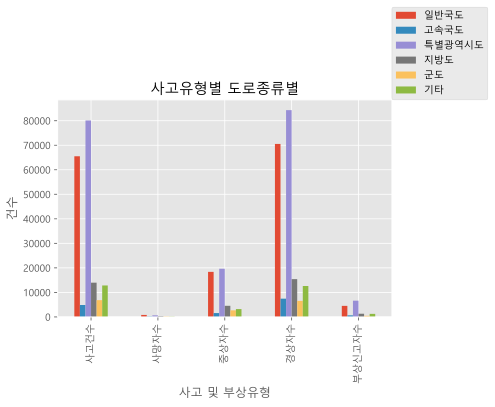

In [163]:
df1_viewer1.plot.bar()
plt.rc("font", family="Malgun Gothic")
plt.style.use("ggplot")
plt.title("사고유형별 도로종류별")
plt.xlabel("사고 및 부상유형")
plt.ylabel("건수")
plt.legend(loc=(1.0, 1.0))
plt.show()

#만들어진 데이터 프레임을 바 차트로 시각화 하여 표현
#차트의 한글이 깨지시면 한번더 런 해보시면 제대로 보입니다.
#한글 사용과 폰트 변경
#타이틀 명 설정
#x,y열의 기준 이름 설정
#범례가 차트를 가리니 자리 이동
#차트 확인

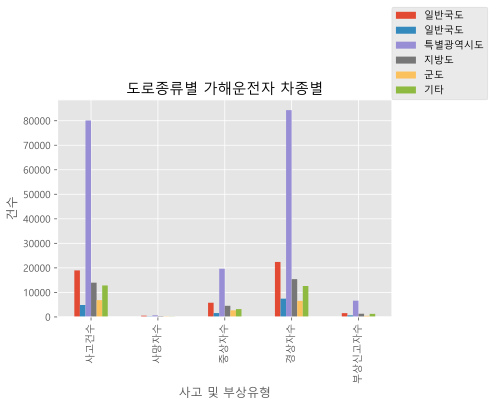

In [127]:
df2_viewer1.plot.bar()
plt.rc("font", family="Malgun Gothic")
plt.style.use("ggplot")
plt.title("도로종류별 가해운전자 차종별")
plt.xlabel("사고 및 부상유형")
plt.ylabel("건수")
plt.legend(loc=(1.0, 1.0))
plt.show()
#만들어진 데이터 프레임을 바 차트로 시각화 하여 표현
#차트의 한글이 깨지시면 한번더 런 해보시면 제대로 보입니다.
#한글 사용과 폰트 변경
#타이틀 명 설정
#x,y열의 기준 이름 설정
#범례가 차트를 가리니 자리 이동
#차트 확인



In [128]:
df2_attackercar = df2
df2_attackercar = pd.DataFrame(df2_attackercar)
df2_attackercar.drop(['도로종류'], axis=1, inplace=True)
df2_attackercar
#가해차량기준으로 데이터를 만듦
#데이터 프레임화 작업
#사용하지 않는 컬럼 도로종류 제거

,가해자차종,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,승용차,12073,269,3602,14916,881
1,승합차,936,17,332,1070,97
2,화물차,3240,133,1073,3966,202
3,특수차,168,2,66,224,3
4,이륜차,1456,73,440,1273,226
...,...,...,...,...,...,...
81,개인형이동수단(PM),245,4,55,169,38
82,건설기계,164,6,56,136,6
83,농기계,85,21,25,51,4
84,기타,16,0,6,8,3


In [129]:
df2_attackercar.sort_values(by=["가해자차종"], ascending=True)
df2_개인형이동수단_PM = df2_attackercar[df2_attackercar['가해자차종']=='개인형이동수단(PM)']
df2_개인형이동수단_PM = df2_개인형이동수단_PM.set_index('가해자차종')
df2_개인형이동수단_PM = df2_개인형이동수단_PM.sum()
df2_개인형이동수단_PM = pd.DataFrame(df2_개인형이동수단_PM)
df2_개인형이동수단_PM.set_axis(labels=['개인형이동수단(PM)'],axis = 1, inplace=True)
df2_개인형이동수단_PM = df2_개인형이동수단_PM.transpose()
df2_개인형이동수단_PM
#가해자차종별로 정렬작업
#가해자 차종 개인형이동수단(PM)기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 개인형이동수단(PM)이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
개인형이동수단(PM),1735,19,437,1136,328


In [130]:
df2_건설기계 = df2_attackercar[df2_attackercar['가해자차종']=='건설기계']
df2_건설기계 = df2_건설기계.set_index('가해자차종')
df2_건설기계 = df2_건설기계.sum()
df2_건설기계 = pd.DataFrame(df2_건설기계)
df2_건설기계.set_axis(labels=['건설기계'],axis = 1, inplace=True)
df2_건설기계 = df2_건설기계.transpose()
df2_건설기계
#가해자 차종 건설기계기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 건설기계이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
건설기계,2510,79,749,2741,109


In [131]:
df2_기타 = df2_attackercar[df2_attackercar['가해자차종']=='기타']
df2_기타 = df2_기타.set_index('가해자차종')
df2_기타 = df2_기타.sum()
df2_기타 = pd.DataFrame(df2_기타)
df2_기타.set_axis(labels=['기타'],axis = 1, inplace=True)
df2_기타 = df2_기타.transpose()
df2_기타
#가해자 차종 기타 기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 기타 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
기타,149,6,52,93,25


In [132]:
df2_농기계 = df2_attackercar[df2_attackercar['가해자차종']=='농기계']
df2_농기계 = df2_농기계.set_index('가해자차종')
df2_농기계 = df2_농기계.sum()
df2_농기계 = pd.DataFrame(df2_농기계)
df2_농기계.set_axis(labels=['농기계'],axis = 1, inplace=True)
df2_농기계 = df2_농기계.transpose()
df2_농기계
#가해자 차종 농기계 기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 농기계 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
농기계,364,62,155,220,19


In [133]:
df2_사륜오토바이_ATV = df2_attackercar[df2_attackercar['가해자차종']=='사륜오토바이(ATV)']
df2_사륜오토바이_ATV = df2_사륜오토바이_ATV.set_index('가해자차종')
df2_사륜오토바이_ATV = df2_사륜오토바이_ATV.sum()
df2_사륜오토바이_ATV = pd.DataFrame(df2_사륜오토바이_ATV)
df2_사륜오토바이_ATV.set_axis(labels=['사륜오토바이(ATV)'],axis = 1, inplace=True)
df2_사륜오토바이_ATV = df2_사륜오토바이_ATV.transpose()
df2_사륜오토바이_ATV
#가해자 차종 사륜오토바이_ATV 기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 사륜오토바이_ATV  이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
사륜오토바이(ATV),249,23,89,162,28


In [134]:
df2_승용차 = df2_attackercar[df2_attackercar['가해자차종']=='승용차']
df2_승용차 = df2_승용차.set_index('가해자차종')
df2_승용차 = df2_승용차.sum()
df2_승용차 = pd.DataFrame(df2_승용차)
df2_승용차.set_axis(labels=['승용차'],axis = 1, inplace=True)
df2_승용차 = df2_승용차.transpose()
df2_승용차
#가해자 차종 승용차 기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 승용차  이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
승용차,132440,1348,34530,152644,8512


In [135]:
df2_승합차 = df2_attackercar[df2_attackercar['가해자차종']=='승합차']
df2_승합차 = df2_승합차.set_index('가해자차종')
df2_승합차 = df2_승합차.sum()
df2_승합차 = pd.DataFrame(df2_승합차)
df2_승합차.set_axis(labels=['승합차'],axis = 1, inplace=True)
df2_승합차 = df2_승합차.transpose()
df2_승합차
#가해자 차종 승합차 기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 승합차  이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
승합차,9923,146,3280,10430,800


In [136]:
df2_이륜차 = df2_attackercar[df2_attackercar['가해자차종']=='이륜차']
df2_이륜차 = df2_이륜차.set_index('가해자차종')
df2_이륜차 = df2_이륜차.sum()
df2_이륜차 = pd.DataFrame(df2_이륜차)
df2_이륜차.set_axis(labels=['이륜차'],axis = 1, inplace=True)
df2_이륜차 = df2_이륜차.transpose()
df2_이륜차
#가해자 차종 이륜차 기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 이륜차  이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
이륜차,18375,397,5581,15370,2895


In [137]:
df2_원동기장치자전거 = df2_attackercar[df2_attackercar['가해자차종']=='원동기장치자전거']
df2_원동기장치자전거 = df2_원동기장치자전거.set_index('가해자차종')
df2_원동기장치자전거 = df2_원동기장치자전거.sum()
df2_원동기장치자전거 = pd.DataFrame(df2_원동기장치자전거)
df2_원동기장치자전거.set_axis(labels=['원동기장치자전거'],axis = 1, inplace=True)
df2_원동기장치자전거 = df2_원동기장치자전거.transpose()
df2_원동기장치자전거
#가해자 차종 원동기장치자전거 기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 원동기장치자전거  이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
원동기장치자전거,1974,39,603,1545,344


In [138]:
df2_자전거 = df2_attackercar[df2_attackercar['가해자차종']=='자전거']
df2_자전거 = df2_자전거.set_index('가해자차종')
df2_자전거 = df2_자전거.sum()
df2_자전거 = pd.DataFrame(df2_자전거)
df2_자전거.set_axis(labels=['자전거'],axis = 1, inplace=True)
df2_자전거 = df2_자전거.transpose()
df2_자전거
#가해자 차종 자전거 기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 자전거  이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
자전거,5509,70,1665,3168,1166


In [139]:
df2_특수차 = df2_attackercar[df2_attackercar['가해자차종']=='특수차']
df2_특수차 = df2_특수차.set_index('가해자차종')
df2_특수차 = df2_특수차.sum()
df2_특수차 = pd.DataFrame(df2_특수차)
df2_특수차.set_axis(labels=['특수차'],axis = 1, inplace=True)
df2_특수차 = df2_특수차.transpose()
df2_특수차
#가해자 차종 특수차 기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 특수차  이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
특수차,1228,39,379,1422,46


In [140]:
df2_화물차 = df2_attackercar[df2_attackercar['가해자차종']=='화물차']
df2_화물차 = df2_화물차.set_index('가해자차종')
df2_화물차 = df2_화물차.sum()
df2_화물차 = pd.DataFrame(df2_화물차)
df2_화물차.set_axis(labels=['화물차'],axis = 1, inplace=True)
df2_화물차 = df2_화물차.transpose()
df2_화물차
#가해자 차종 화물차 기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 화물차  이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
화물차,26081,687,8067,28473,1512


In [141]:
df2_불명 = df2_attackercar[df2_attackercar['가해자차종']=='불명']
df2_불명 = df2_불명.set_index('가해자차종')
df2_불명 = df2_불명.sum()
df2_불명 = pd.DataFrame(df2_불명)
df2_불명.set_axis(labels=['불명'],axis = 1, inplace=True)
df2_불명 = df2_불명.transpose()
df2_불명
#가해자 차종 불명 기준으로 데이터를 추출
#가해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 불명  이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
불명,2593,1,318,1879,636


In [142]:
df2_attackercarviewer = pd.concat([df2_승용차, df2_승합차, df2_화물차, df2_특수차,
                                  df2_이륜차, df2_사륜오토바이_ATV, df2_원동기장치자전거,
                                  df2_자전거, df2_개인형이동수단_PM, df2_건설기계,
                                  df2_농기계, df2_기타, df2_불명])
df2_attackercarviewer
#Pandas의 concat 함수를 사용해 각 데이터 프레임을 하나의 데이터 프레임으로 열기준으로 합병

,사고건수,사망자수,중상자수,경상자수,부상신고자수
승용차,132440,1348,34530,152644,8512
승합차,9923,146,3280,10430,800
화물차,26081,687,8067,28473,1512
특수차,1228,39,379,1422,46
이륜차,18375,397,5581,15370,2895
사륜오토바이(ATV),249,23,89,162,28
원동기장치자전거,1974,39,603,1545,344
자전거,5509,70,1665,3168,1166
개인형이동수단(PM),1735,19,437,1136,328
건설기계,2510,79,749,2741,109


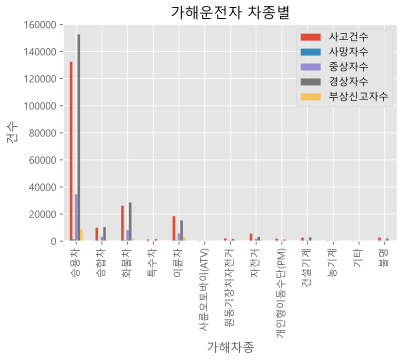

In [143]:
df2_attackercarviewer.plot.bar()
plt.title("가해운전자 차종별")
plt.xlabel("가해차종")
plt.ylabel("건수")
plt.show()
#가해차량 차종별 바 차트시각화
#타이틀 이름 설정
#x,y 기준 라벨 이름 설정

In [144]:
df3_Victim = df3
df3_Victim.drop(['가해당사자종'], axis = 1, inplace =True)
df3_Victim
#데이터프레임을 생성
#사용하지 않는 가해당사자종 열 제거

,피해당사자종,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,승용차,69118,165,12318,102428,4841
1,승합차,4201,24,1017,7198,533
2,화물차,7619,73,1721,9889,590
3,특수차,463,11,76,553,40
4,이륜차,17805,130,6851,12062,618
...,...,...,...,...,...,...
143,개인형이동수단(PM),43,1,9,23,10
144,건설기계,4,0,2,2,0
145,농기계,1,0,0,1,0
146,보행자,986,0,115,601,278


In [145]:
df3_승용차 = df3_Victim[df3_Victim['피해당사자종']=='승용차']
df3_승용차 = df3_승용차.set_index('피해당사자종')
df3_승용차 = df3_승용차.sum()
df3_승용차 = pd.DataFrame(df3_승용차)
df3_승용차.set_axis(labels=['승용차'],axis = 1, inplace=True)
df3_승용차 = df3_승용차.transpose()
df3_승용차
#피해자 차종 승용차 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 승용차 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
승용차,101895,402,19288,142188,8738


In [146]:
df3_승합차 = df3_Victim[df3_Victim['피해당사자종']=='승합차']
df3_승합차 = df3_승합차.set_index('피해당사자종')
df3_승합차 = df3_승합차.sum()
df3_승합차 = pd.DataFrame(df3_승합차)
df3_승합차.set_axis(labels=['승합차'],axis = 1, inplace=True)
df3_승합차 = df3_승합차.transpose()
df3_승합차
#피해자 차종 승합차 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 승합차 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
승합차,6413,57,1719,10208,929


In [147]:
df3_화물차 = df3_Victim[df3_Victim['피해당사자종']=='화물차']
df3_화물차 = df3_화물차.set_index('피해당사자종')
df3_화물차 = df3_화물차.sum()
df3_화물차 = pd.DataFrame(df3_화물차)
df3_화물차.set_axis(labels=['화물차'],axis = 1, inplace=True)
df3_화물차 = df3_화물차.transpose()
df3_화물차
#피해자 차종 화물차 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 화물차 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
화물차,13237,269,3592,15890,1261


In [148]:
df3_특수차 = df3_Victim[df3_Victim['피해당사자종']=='특수차']
df3_특수차 = df3_특수차.set_index('피해당사자종')
df3_특수차 = df3_특수차.sum()
df3_특수차 = pd.DataFrame(df3_특수차)
df3_특수차.set_axis(labels=['특수차'],axis = 1, inplace=True)
df3_특수차 = df3_특수차.transpose()
df3_특수차
#피해자 차종 특수차 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 특수차 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
특수차,772,29,200,877,66


In [149]:
df3_이륜차 = df3_Victim[df3_Victim['피해당사자종']=='이륜차']
df3_이륜차 = df3_이륜차.set_index('피해당사자종')
df3_이륜차 = df3_이륜차.sum()
df3_이륜차 = pd.DataFrame(df3_이륜차)
df3_이륜차.set_axis(labels=['이륜차'],axis = 1, inplace=True)
df3_이륜차 = df3_이륜차.transpose()
df3_이륜차
#피해자 차종 이륜차 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 이륜차 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
이륜차,24456,216,9421,16612,1181


In [150]:
df3_사륜오토바이_ATV = df3_Victim[df3_Victim['피해당사자종']=='사륜오토바이(ATV)']
df3_사륜오토바이_ATV = df3_사륜오토바이_ATV.set_index('피해당사자종')
df3_사륜오토바이_ATV = df3_사륜오토바이_ATV.sum()
df3_사륜오토바이_ATV = pd.DataFrame(df3_사륜오토바이_ATV)
df3_사륜오토바이_ATV.set_axis(labels=['사륜오토바이(ATV)'],axis = 1, inplace=True)
df3_사륜오토바이_ATV = df3_사륜오토바이_ATV.transpose()
df3_사륜오토바이_ATV
#피해자 차종 사륜오토바이_ATV 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 사륜오토바이_ATV 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
사륜오토바이(ATV),139,15,74,73,5


In [151]:
df3_원동기장치자전거 = df3_Victim[df3_Victim['피해당사자종']=='원동기장치자전거']
df3_원동기장치자전거 = df3_원동기장치자전거.set_index('피해당사자종')
df3_원동기장치자전거 = df3_원동기장치자전거.sum()
df3_원동기장치자전거 = pd.DataFrame(df3_원동기장치자전거)
df3_원동기장치자전거.set_axis(labels=['원동기장치자전거'],axis = 1, inplace=True)
df3_원동기장치자전거 = df3_원동기장치자전거.transpose()
df3_원동기장치자전거
#피해자 차종 원동기장치자전거 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 원동기장치자전거 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
원동기장치자전거,2384,26,892,1609,137


In [152]:
df3_자전거 = df3_Victim[df3_Victim['피해당사자종']=='자전거']
df3_자전거 = df3_자전거.set_index('피해당사자종')
df3_자전거 = df3_자전거.sum()
df3_자전거 = pd.DataFrame(df3_자전거)
df3_자전거.set_axis(labels=['자전거'],axis = 1, inplace=True)
df3_자전거 = df3_자전거.transpose()
df3_자전거
#피해자 차종 자전거 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 자전거 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
자전거,7960,114,3034,4732,530


In [153]:
df3_개인형이동수단_PM = df3_Victim[df3_Victim['피해당사자종']=='개인형이동수단(PM)']
df3_개인형이동수단_PM = df3_개인형이동수단_PM.set_index('피해당사자종')
df3_개인형이동수단_PM = df3_개인형이동수단_PM.sum()
df3_개인형이동수단_PM = pd.DataFrame(df3_개인형이동수단_PM)
df3_개인형이동수단_PM.set_axis(labels=['개인형이동수단(PM)'],axis = 1, inplace=True)
df3_개인형이동수단_PM = df3_개인형이동수단_PM.transpose()
df3_개인형이동수단_PM
#피해자 차종 개인형이동수단_PM 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 개인형이동수단_PM 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
개인형이동수단(PM),1123,9,383,755,68


In [154]:
df3_건설기계 = df3_Victim[df3_Victim['피해당사자종']=='건설기계']
df3_건설기계 = df3_건설기계.set_index('피해당사자종')
df3_건설기계 = df3_건설기계.sum()
df3_건설기계 = pd.DataFrame(df3_건설기계)
df3_건설기계.set_axis(labels=['건설기계'],axis = 1, inplace=True)
df3_건설기계 = df3_건설기계.transpose()
df3_건설기계
#피해자 차종 건설기계 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 건설기계 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
건설기계,1022,60,244,1072,115


In [155]:
df3_농기계 = df3_Victim[df3_Victim['피해당사자종']=='농기계']
df3_농기계 = df3_농기계.set_index('피해당사자종')
df3_농기계 = df3_농기계.sum()
df3_농기계 = pd.DataFrame(df3_농기계)
df3_농기계.set_axis(labels=['농기계'],axis = 1, inplace=True)
df3_농기계 = df3_농기계.transpose()
df3_농기계
#피해자 차종 농기계 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 농기계 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
농기계,367,37,232,216,27


In [156]:
df3_기타 = df3_Victim[df3_Victim['피해당사자종']=='기타/불명']
df3_기타 = df3_기타.set_index('피해당사자종')
df3_기타 = df3_기타.sum()
df3_기타 = pd.DataFrame(df3_기타)
df3_기타.set_axis(labels=['기타/불명'],axis = 1, inplace=True)
df3_기타 = df3_기타.transpose()
df3_기타
#피해자 차종 기타 기준으로 데이터를 추출
#피해자 차종을 기준으로 index 설정
#자료의 통계를 합계처리
#바뀐 데이터 형을 데이터 프레임화 작업
#열 기준으로 기타 이름을 생성
#열과 행을 바꾸는 작업

,사고건수,사망자수,중상자수,경상자수,부상신고자수
기타/불명,8093,704,3194,4456,1408


In [157]:
df3_Victimviewer = pd.concat([df3_승용차, df3_승합차, df3_화물차, df3_특수차,
                             df3_이륜차, df3_사륜오토바이_ATV, df3_원동기장치자전거,
                             df3_자전거, df3_개인형이동수단_PM, df3_건설기계,
                             df3_농기계, df3_기타])
df3_Victimviewer

#Pandas의 concat 함수를 사용해 각 데이터 프레임을 하나의 데이터 프레임으로 열기준으로 합병

,사고건수,사망자수,중상자수,경상자수,부상신고자수
승용차,101895,402,19288,142188,8738
승합차,6413,57,1719,10208,929
화물차,13237,269,3592,15890,1261
특수차,772,29,200,877,66
이륜차,24456,216,9421,16612,1181
사륜오토바이(ATV),139,15,74,73,5
원동기장치자전거,2384,26,892,1609,137
자전거,7960,114,3034,4732,530
개인형이동수단(PM),1123,9,383,755,68
건설기계,1022,60,244,1072,115


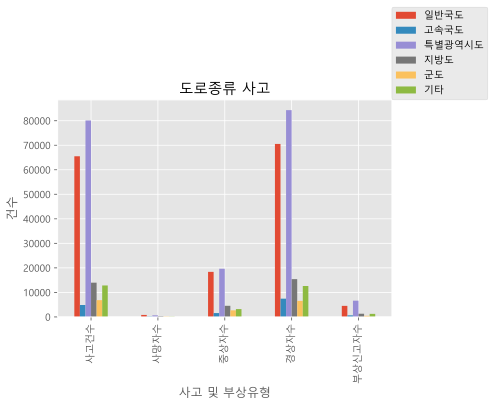

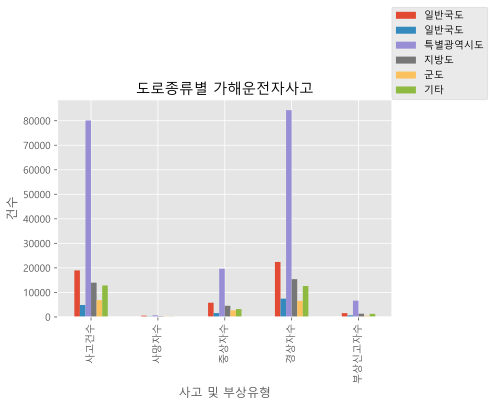

In [158]:
df1_viewer1.plot.bar()
plt.rc("font", family="Malgun Gothic")
plt.style.use("ggplot")
plt.title("도로종류 사고")
plt.xlabel("사고 및 부상유형")
plt.ylabel("건수")
plt.legend(loc=(1.0, 1.0))
plt.show()
#바 차트 시각화 된 자료를 확인
#폰트 설정 및 스타일설정
#타이틀 및 x,y 기준 이름 설정
#범례 위치 이동
df2_viewer1.plot.bar()
plt.title("도로종류별 가해운전자사고")
plt.xlabel("사고 및 부상유형")
plt.ylabel("건수")
plt.legend(loc=(1.0, 1.0))
plt.show()
#바 차트 시각화 된 자료를 확인
#폰트 설정 및 스타일설정
#타이틀 및 x,y 기준 이름 설정
#범례 위치 이동



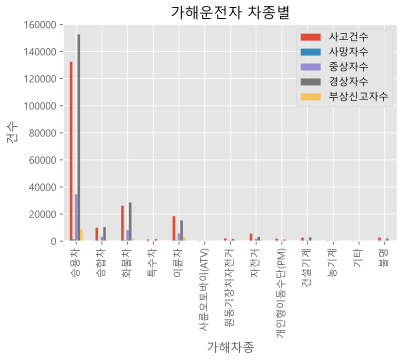

In [159]:
df2_attackercarviewer.plot.bar()
plt.title("가해운전자 차종별")
plt.xlabel("가해차종")
plt.ylabel("건수")
plt.show()
#바 차트 시각화 된 자료를 확인
#폰트 설정 및 스타일설정
#타이틀 및 x,y 기준 이름 설정
#범례 위치 이동

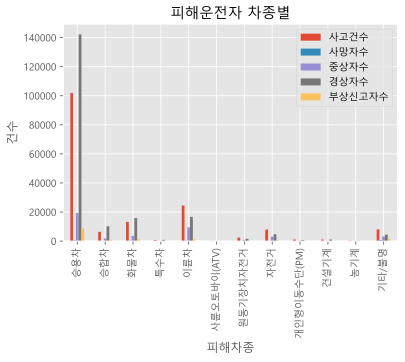

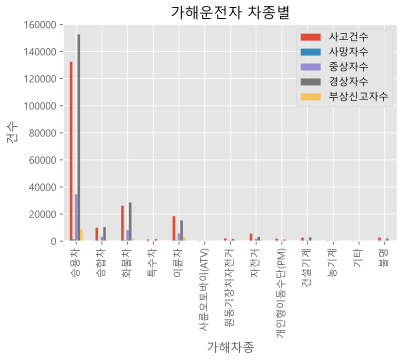

In [160]:
df3_Victimviewer.plot.bar()
plt.title("피해운전자 차종별")
plt.xlabel("피해차종")
plt.ylabel("건수")
plt.show()
#바 차트 시각화 된 자료를 확인
#폰트 설정 및 스타일설정
#타이틀 및 x,y 기준 이름 설정
#범례 위치 이동
df2_attackercarviewer.plot.bar()
plt.title("가해운전자 차종별")
plt.xlabel("가해차종")
plt.ylabel("건수")
plt.show()
#바 차트 시각화 된 자료를 확인
#폰트 설정 및 스타일설정
#타이틀 및 x,y 기준 이름 설정
#범례 위치 이동



Text(0.5, 1.0, '가해차종별 사망자수')

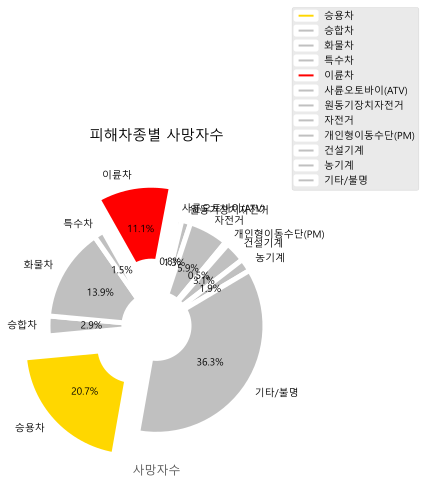

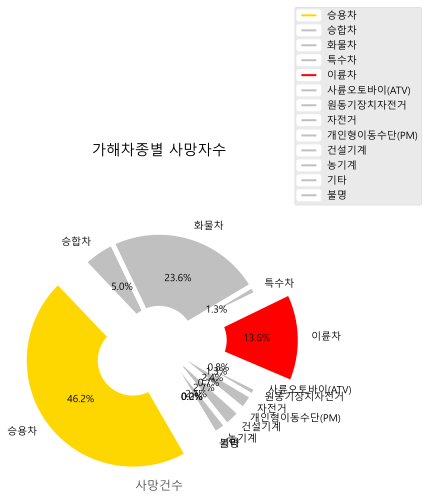

In [161]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.3 ,0 ,0 ,0, 0.3, 0, 0, 0, 0, 0, 0, 0]
colors = ['gold', 'silver', 'silver', 'silver','red','silver','silver',
          'silver','silver','silver','silver', 'silver']
plot사망자수 = df3_Victimviewer.plot.pie(y='사망자수',
                                    subplots=True,figsize=(10, 5),startangle=260, 
                                    counterclock=False, colors=colors,
                                    autopct='%.1f%%', explode=explode,
                                    wedgeprops=wedgeprops
                                    )
plt.xlabel('사망자수')
plt.ylabel('')
plt.legend(loc=(1.0, 1.0))
plt.title('피해차종별 사망자수',loc='center', pad=50)
#파이 차트에 각각 퍼센트와 이름표시
#파이 차트에서 바깥으로 빼날 특정부분
#파이 차트에서 색상 설정
#파이차트 시각화 작업
#라벨 작업
#범례 위치 이동
#타이틀 위치 및 이름설정

explode = [0.3 ,0 ,0 ,0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0]
colors = ['gold', 'silver', 'silver', 'silver','red','silver','silver',
          'silver','silver','silver','silver', 'silver', 'silver']
plot사고건수 = df2_attackercarviewer.plot.pie(y='사망자수',
                                    subplots=True,figsize=(10, 5),startangle=300, 
                                    counterclock=False, colors=colors,
                                    autopct='%.1f%%', explode=explode,
                                    wedgeprops=wedgeprops
                                    )
plt.xlabel('사망건수')
plt.ylabel('')
plt.legend(loc=(1.0, 1.0))
plt.title('가해차종별 사망자수',loc='center', pad=50)
#파이 차트에서 바깥으로 빼날 특정부분
#파이 차트에서 색상 설정
#파이차트 시각화 작업
#라벨 작업
#범례 위치 이동
#타이틀 위치 및 이름설정



Text(0.5, 1.0, '특별광역시도 사고건수')

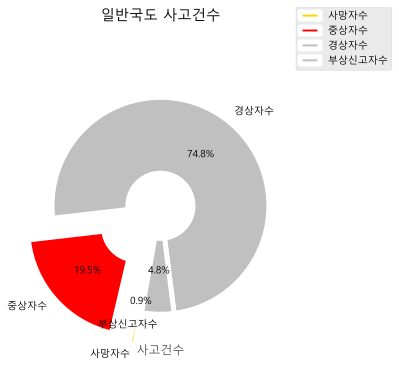

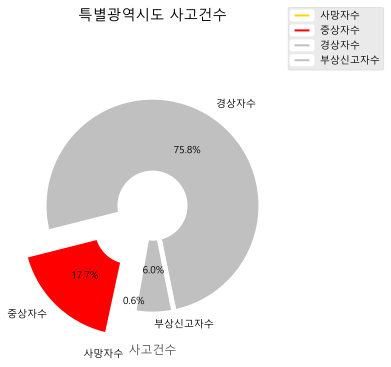

In [162]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.3 ,0.3 ,0 ,0]
colors = ['gold', 'red', 'silver', 'silver']
plot도로사고 = df1_viewer2.plot.pie(y='일반국도',
                                    subplots=True,figsize=(10, 5),startangle=260, 
                                    counterclock=False, colors=colors,
                                    autopct='%.1f%%', explode=explode,
                                    wedgeprops=wedgeprops
                                    )
plt.xlabel('사고건수')
plt.ylabel('')
plt.legend(loc=(1.0, 1.0))
plt.title('일반국도 사고건수',loc='center', pad=50)
#파이 차트에 각각 퍼센트와 이름표시
#파이 차트에서 바깥으로 빼날 특정부분
#파이 차트에서 색상 설정
#파이차트 시각화 작업
#라벨 작업
#범례 위치 이동
#타이틀 위치 및 이름설정

plot도로사고1 = df1_viewer2.plot.pie(y='특별광역시도',
                                    subplots=True,figsize=(10, 5),startangle=260, 
                                    counterclock=False, colors=colors,
                                    autopct='%.1f%%', explode=explode,
                                    wedgeprops=wedgeprops
                                    )
plt.xlabel('사고건수')
plt.ylabel('')
plt.legend(loc=(1.0, 1.0))
plt.title('특별광역시도 사고건수',loc='center', pad=50)
#파이 차트에 각각 퍼센트와 이름표시
#파이 차트에서 바깥으로 빼날 특정부분
#파이 차트에서 색상 설정
#파이차트 시각화 작업
#라벨 작업
#범례 위치 이동
#타이틀 위치 및 이름설정



# Insight
### 차량사고가 무수히 많지만 일반도시와 특별광역도시에서의 차량 통행과 사고가 많아졌다. 그와 비례하게 사고건수와 사망자, 중상자가 늘어났다.
### 특히 사고건수에 비해 이륜차의 사고가 많아졌다. 이륜차의 경우 운전자를 보호해주는 프레임이 없기 때문에 사고가 났을때 사망사고로 연결될 확률이 높다는 것을 알 수 있었다.
### 이륜차의 경우 배달운전자의 증가함에 따라 사고가 더 많이 나는데, 교통법규 준수, 안전 운전, 이륜차 운전자에 대한 보호 대책등을 강구 해야할 것 같다는 의견이 나온다.
### 특히 사고중에도 피해차량이 이륜차일 때가 가해차량이 이륜차일 때보다 사망 비율이 높다. 이런 것은 이륜차 운전자들이 조심하더라도 사고가 났을때 경상을 비하기 어렵다는 말이다.
### 이륜차량에 대한 안전 방법으로 이륜차량 전용도로, 이륜차 앞자리 번호판등 제제와 안전수단을 같이 강구하여 주면 좋을 것 같다.